In [38]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import random

In [2]:
df_public = pd.read_csv('Dataset/survey_results_public.csv')
df_schema = pd.read_csv('Dataset/survey_results_schema.csv')

In [4]:
df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [3]:
df_public.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploring our data

In [5]:
df_public.shape

(51392, 154)

### Handle missing values is important part in a DataScience project

In [10]:
no_null = set(df_public.columns[df_public.isnull().mean()==0])
print("These columns are fully populated, no missing values identified:")
no_null

These columns are fully populated, no missing values identified:


{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [11]:
# Top 5 columns with missing values
missing_cols = df_public.isnull().mean()
missing_cols.sort_values(ascending=False).head(5)

ExCoder10Years        0.982157
ExCoderNotForMe       0.982079
ExCoderWillNotCode    0.982059
ExCoderBalance        0.982040
ExCoderReturn         0.982040
dtype: float64

In [14]:
# How many columns with more than 75% missing data?
public_cols = df_public.columns
public_cols[missing_cols > 0.75]

Index(['YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe',
       'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'TimeAfterBootcamp',
       'ExpectedSalary'],
      dtype='object')

In [18]:
# How many country in out dataset?
countries = df_public["Country"].unique()
print(f'we have: {df_public["Country"].nunique()} countries')

we have: 201 countries


## 1st Question: Which countries have the most surveys?

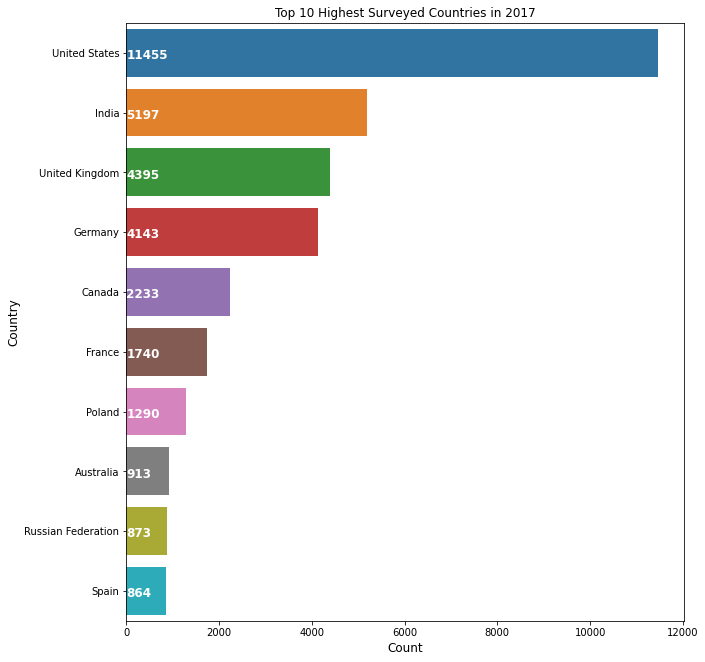

In [33]:
surveyed_df = df_public["Country"].value_counts().sort_values(ascending=False).reset_index(name="Count")
surveyed_df.columns = ["Country", "Count"]
visual_surveyed_df = surveyed_df.head(10)

plt.figure(figsize=(10, 11))
ax = sns.barplot(x="Count", y="Country",
                 data=visual_surveyed_df, linewidth=1)
for i, j in enumerate(visual_surveyed_df["Count"]):
    ax.text(0, i + 0.1, j, weight="bold", color="white", fontsize=12)
plt.title("Top 10 Highest Surveyed Countries in 2017")
ax.set_xlabel(xlabel='Count', fontsize=12)
ax.set_ylabel(ylabel='Country', fontsize=12)
plt.show()

## 2nd Question: What are the least popular programming languages?

In [34]:
# Drop missing value in HaveWorkedLanguage column
programming_lang_df = df_public.dropna(subset=["HaveWorkedLanguage"])
programming_lang_df["HaveWorkedLanguage"] = programming_lang_df["HaveWorkedLanguage"].apply(lambda x: str(x).split("; "))

/var/folders/rd/xpnz68112p1dhg9n7d178x1r0000gn/T/ipykernel_4945/221460264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  programming_lang_df["HaveWorkedLanguage"] = programming_lang_df["HaveWorkedLanguage"].apply(lambda x: str(x).split("; "))


In [42]:
# least popular programming languages
programming_lang_dict = sorted(dict(Counter(list(itertools.chain(*programming_lang_df["HaveWorkedLanguage"].values)))).items(), key=lambda x: x[1])

pgl_rank_df = pd.DataFrame(programming_lang_dict, columns=["Programming Language", "Count"])
pgl_rank_df.head()

,Programming Language,Count
0,Hack,107
1,Julia,138
2,Dart,145
3,Common Lisp,273
4,Erlang,281


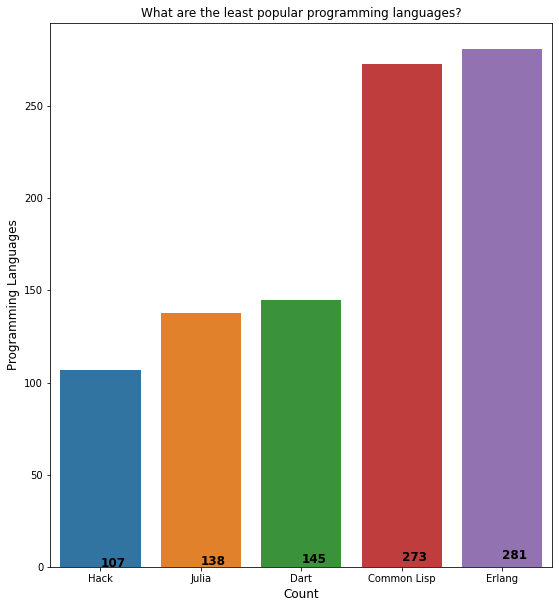

In [105]:
plt.figure(figsize=(9, 10))

tmp = pgl_rank_df.head()
ax = sns.barplot(y="Count", x="Programming Language",
                 data=tmp, linewidth=1)

for i, j in enumerate(tmp["Count"]):
    ax.text(i, i + 0.1, j, weight="bold", color="black", fontsize=12)
plt.title("What are the least popular programming languages?")
ax.set_xlabel(xlabel='Count', fontsize=12)
ax.set_ylabel(ylabel='Programming Languages', fontsize=12)
plt.show()

## 3rd Question: what are the countries with the least job satisfaction ratings

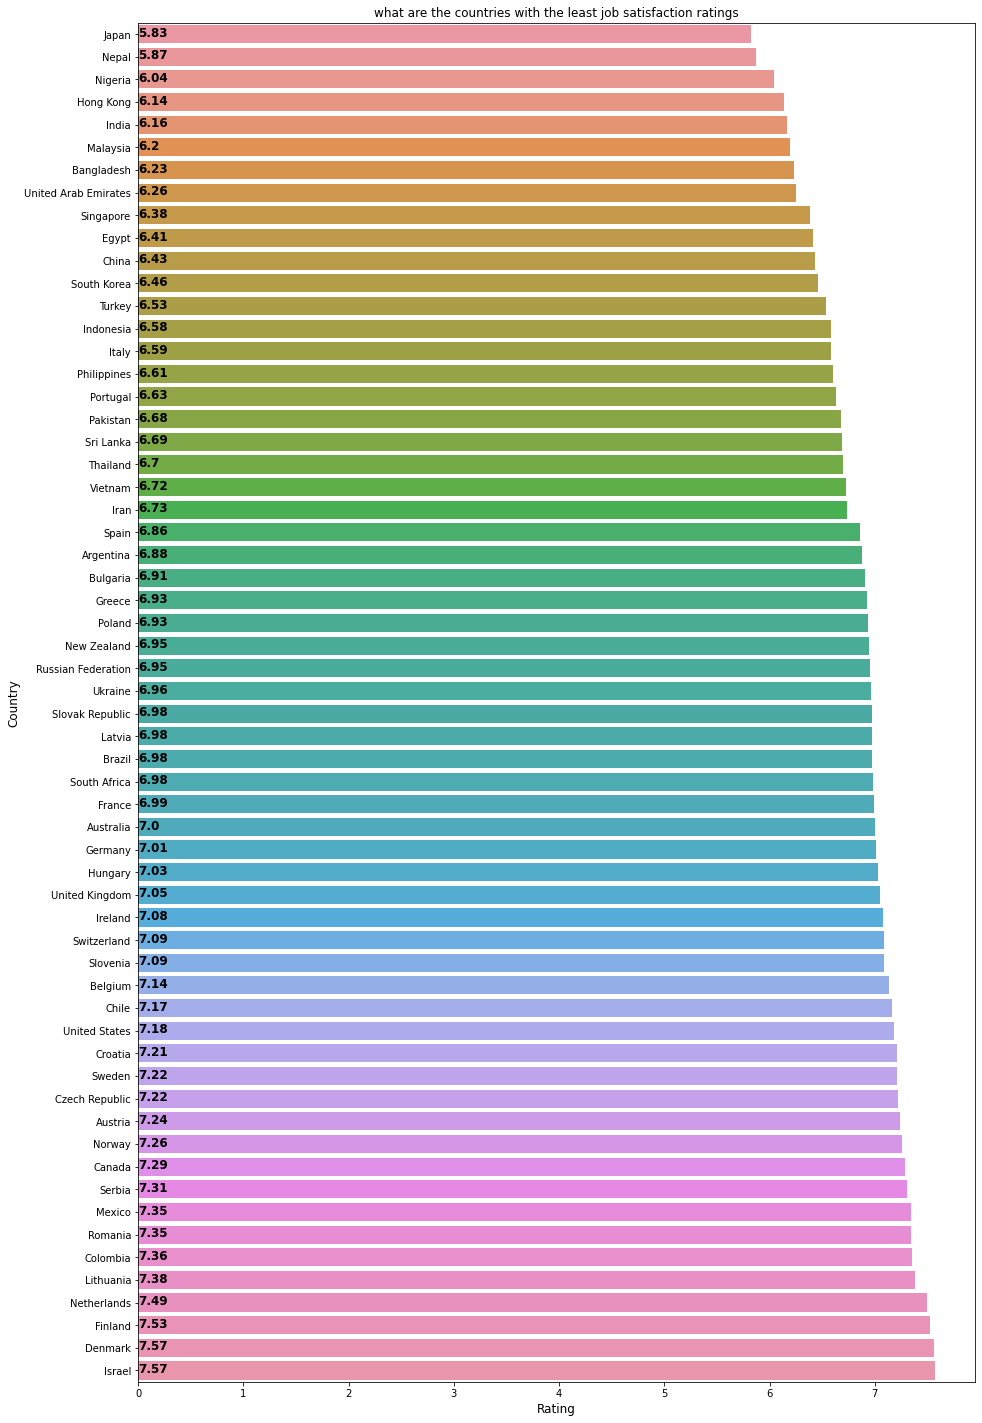

In [65]:
countries_60_list = list(surveyed_df.head(61)["Country"].values)
countries_60_list.remove("I prefer not to say")
countries_60_list = countries_60_list[:60]
# Drop missing value in JobSatisfaction column
satisfy_surveyed_df = df_public[df_public.Country.isin(countries_60_list)].dropna(subset=["JobSatisfaction"])


plt.figure(figsize=(15, 25))
tmp = satisfy_surveyed_df.groupby("Country")["JobSatisfaction"].mean().sort_values(ascending=True).reset_index()
ax = sns.barplot(x="JobSatisfaction", y="Country",
                 data=tmp, linewidth=1)
for i, j in enumerate(tmp["JobSatisfaction"]):
    ax.text(0, i + 0.1, round(j, 2), weight="bold", color="black", fontsize=12)
plt.title("what are the countries with the least job satisfaction ratings")
ax.set_xlabel(xlabel='Rating', fontsize=12)
ax.set_ylabel(ylabel='Country', fontsize=12)
plt.show()

Japan and Nepal have the lowest job satisfaction ratings of 5.83. Meanwhile, Denmark is one of the highest countries with the most job satisfaction of 7.57

## 4th Question: What are the least popular programming languages or KSA?

In [76]:
def extract_lang(x):
    """
    Apply function to extract values from combined cell values.
  
    Parameters:
    x (GroupByDataFrame): Groupby data Frame
  
    Returns:
    DataFrame: Include programming language, count, All Programming Languages columns
    """
    sorted_pl = sorted(dict(Counter(list(itertools.chain(*x)))).items(), key=lambda x: x[1])
    return pd.DataFrame([{"Programming Language": sorted_pl[-1][0], "Count": sorted_pl[-1][1], "All Programming Languages": sorted_pl}])
    
most_popular_pg_lan_df = programming_lang_df.groupby("Country")["HaveWorkedLanguage"].apply(extract_lang).sort_values(by="Count", ascending=False).reset_index()
most_popular_pg_lan_df.head(10)

,Country,level_1,Programming Language,Count,All Programming Languages
0,United States,0,JavaScript,5699,"[(Hack, 27), (Dart, 39), (Julia, 42), (Erlang,..."
1,United Kingdom,0,JavaScript,2214,"[(Dart, 9), (Julia, 11), (Hack, 13), (Smalltal..."
2,Germany,0,JavaScript,1770,"[(Hack, 5), (Julia, 13), (Dart, 13), (Erlang, ..."
3,India,0,JavaScript,1580,"[(Dart, 6), (Hack, 6), (F#, 7), (Rust, 8), (Ju..."
4,Canada,0,JavaScript,1104,"[(Hack, 3), (Julia, 5), (Common Lisp, 9), (Dar..."
5,France,0,JavaScript,807,"[(Julia, 3), (Hack, 6), (Dart, 7), (Clojure, 1..."
6,Poland,0,JavaScript,563,"[(Hack, 1), (Smalltalk, 2), (Dart, 3), (Julia,..."
7,Australia,0,JavaScript,476,"[(Erlang, 1), (Hack, 2), (Julia, 4), (Common L..."
8,Netherlands,0,JavaScript,416,"[(Julia, 1), (Hack, 2), (Dart, 2), (Erlang, 5)..."
9,Spain,0,JavaScript,390,"[(Dart, 2), (Smalltalk, 2), (Elixir, 2), (Juli..."


In [96]:
ksa_df = pd.DataFrame(most_popular_pg_lan_df[most_popular_pg_lan_df["Country"] == "Saudi Arabia"]["All Programming Languages"].values[0], columns=["Programming Language", "Count"]).sort_values(by="Count", ascending=False)

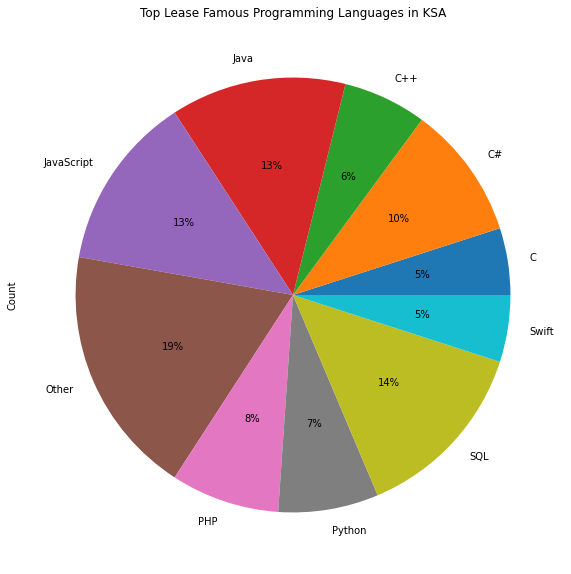

In [106]:
ksa_df["Programming Language"] = ksa_df.apply(lambda x: x["Programming Language"] if x["Count"] > 6 else "Other", axis=1)

plt.figure(figsize=(10, 10))
ksa_df.groupby("Programming Language")["Count"].sum().plot(
    kind='pie', y='Count', autopct='%1.0f%%', title='Top Lease Famous Programming Languages in KSA')
plt.show()

In Saudi Arabia, the most popular language is SQl, Java, Javascript